# Lab Two: Astronomy With The 21-cm Line; Some Microwave Electronics
## By Cee, Grace, Scout, Adam

#### We'll measure the 21cm line twice. For the first, the goal is to master the technical aspects and familiarize ourselves with the system and procedures, so instead of worrying about where to point the horn we'll just take whatever position happens to be overhead. For the second, we'll manuall point the horn to a designated position and make a calibrated profile to compare with a well-established profile measurement.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio
import powerspectrum as pwerSpec
import glob
import scipy.constants
import coord

ModuleNotFoundError: No module named 'coord'

# 6.1 The Recieving System
We will use a double heterodyne system for the 21-cm line at 1420.4 MHz. Double heterodyne means we have two mixing stages.
1. For the first mixer, use the ordinary DSB technique. LO = 1230.0 MHz. The difference frequency will be 190.4 MHz and the sum frequency is 2650.4. We use a 20 MHz-wide bandpass filter centered at 190 MHz to obliterate the sum frequency, so we are left with a replica of the 21-cm line that is centered at 190.4 instead of 1420.4 MHz.

2. For the second mixer use the SSB technique. LO = 190.0MHz, so the output frequencies are positive and negative centered at zero; this is called the baseband. In the absense of a Doppler shift, we are left with the line centered at 0.4 MHz. However, the line is shifted and broadened by galactic rotation and the Earth's orbital velocity, so it covers a range of frequency of 1420.2+=0.5 MHz. We use a low pass filter with a cutoff frequency of 2MHz to eliminate alaiasing, sample the complex signal, and Fourier transform to calculate power spectrum. We take many power spectra and average them to reduce the noise.

## 6.2 Your Measurement
# 1.
Set the system up to observe. Point the horn to the zenith to reduce interference and thermal noise. We use a low pass filter with a cut off frequency of 2 MHz to eliminate aliasing, sample the complex signal, and Fourier transform to calculate the power spectrum. We take many power spectra and average them to reduce noise.

Take some data. How fast must you sample?

We need 2MHz, and Nyquist says we should sample at least twice as much if not more. Say we want 8MHz to be safe. 62.5/8 = 7.8.

#Take 10 samples and average them

data = []
for i in range(10):
    
    test = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000) #Sdual_mode:sample from A and B ports if True
    data.append(test)

avg = sum(data) / len(data)

np.savetxt('lab2_avg_sampledata_2.18',avg)
np.savetxt('lab2_single_sampledata_2.18', data[0])

In [20]:
avg = np.loadtxt('lab2_avg_sampledata_2.18')
avg_signal = pwerSpec.powerspec(complexnumber)

In [35]:
data_0 = np.loadtxt('lab2_single_sampledata_2.18')
real = data_0[:len(data_0)/2]
imag = data_0[len(data_0)/2: len(data_0)]
complexnumber = real + (imag * 1j)
single_signal_complex = pwerSpec.powerspec(complexnumber)
single_signal_imag = pwerSpec.powerspec(imag)
single_signal_real = pwerSpec.powerspec(real)

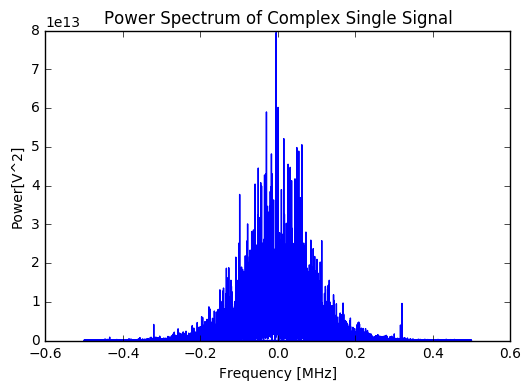

('Median of dataset: ', -0.0043750000000000004)


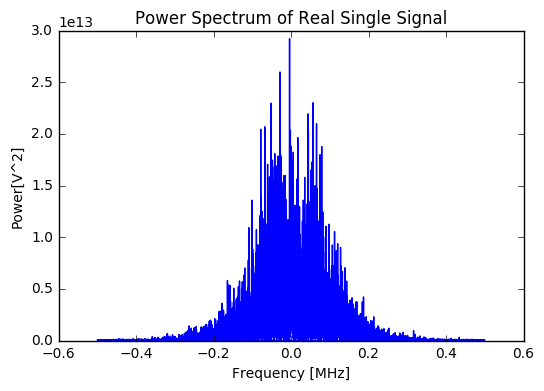

('Median of dataset: ', -0.0043750000000000004)


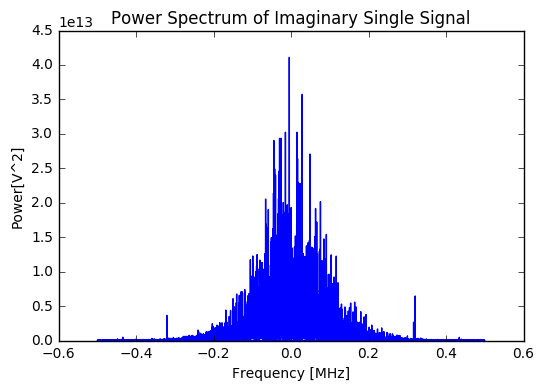

In [36]:
#Complex Single signal
plt.plot(single_signal_complex[1],single_signal_complex[0])
plt.title("Power Spectrum of Complex Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()

print('Median of dataset: ', single_signal_complex[1][np.argmax(single_signal_complex[0])])

#Real Single signal
plt.plot(single_signal_real[1],single_signal_real[0])
plt.title("Power Spectrum of Real Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()

print('Median of dataset: ', single_signal_complex[1][np.argmax(single_signal_complex[0])])

#Imaginary Single signal
plt.plot(single_signal_imag[1],single_signal_imag[0])
plt.title("Power Spectrum of Imaginary Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()



# 2. 
Look at the range of sample values by plotting a bunch of them. Best is to make a histogram. The sampled numbers should cover plenty of of bits, quantization should only be barely, or not at all, evident in the histogram. The histogram shape should be a well known function. Which function? Does it?

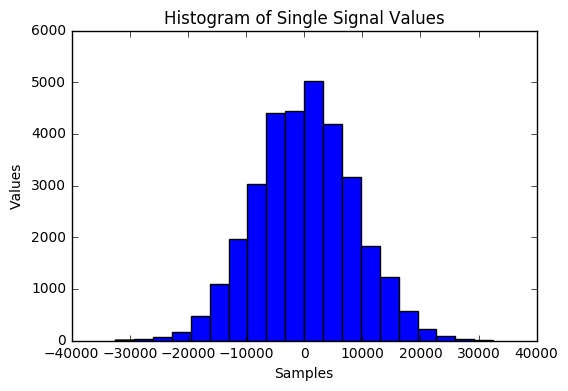

In [37]:

#Histogram
plt.hist(data_0, bins = 20)
plt.title("Histogram of Single Signal Values")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.show()


# 3.
Insert a test signal so that it appears in the upper sideband and take some data; then change the test signal frequency so it's in the lower sideband. You'll use this to make sure the SSB mixer is doing its job properly, and to determine whether the frequency axis is flipped.

test = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('test_1_signal_2.18', test)

In [38]:
test_2 = np.loadtxt('test_1_signal_2.18')
test_2 = pwerSpec.powerspec(test_2)

test_1 = np.loadtxt('test_signal_2.18')
test_1 = pwerSpec.powerspec(test_1)

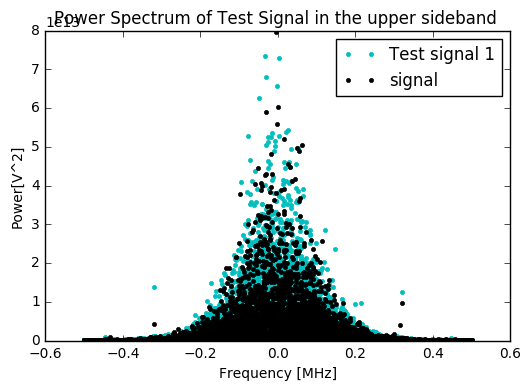

In [44]:
#plt.plot((test_2)[1],(test_2)[0], label = 'Test signal 2')
plt.plot((test_1)[1], (test_1)[0], 'c.', label = 'Test signal 1')

plt.plot(single_signal_complex[1],single_signal_complex[0], 'k.', label = 'signal')



plt.title("Power Spectrum of Test Signal in the upper sideband ")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.legend()
plt.show()

#plt.show()

# Time to do Astronomy

For the first measurement the main goal is to master the technical aspescts, so use whatever position is overhead and point the horn straight up. The line will be strongest for the approximate range LST = 19-6 hr.

In [9]:
lst_now = ugradio.timing.lst() #current LST at NCH

It is most convenient to use the temperature units for the power that wemeasure. Accordingly, the power that we measure is called the system temperature, Tsys. It's a function of frequency ans has two kinds of behavior: the continuum, which is devoid of spectral features and it changes very slowly with frequcny; and the line, which in this case is the 21-cm line and it changes relatively rapidly with frequency--hencoue our desire to obtain the line shape. 

The system temperature has two contributions: the dominant contribution from our electonics, which we call the reciever temperature Trx; and the contribution our antenna picks up from the sky, the sky temperature Tsky. Thus Tsys = Trx + Tsky, and above 150 MHz, usually Trx >> Tsky.

Our horn is equipped with an old, noisy first amplifier so Trx ~ 300K; in contrast, our Leushner telescope is much better, with Trx ~ 50 K. The sky temperature comes from the Cosmic Microwave Background, with brightness temperature Tcmb = 2.7K; from intergalactic space, with brightness temperature Tastro (no more than a few K in continuum and u pto 100K in the HI line frequency. So off the HI line we have Tsky ~ 10K and on the HI line, in the Galactic place where it is strongest, we have Tsky ~ 100K.

We'll take two sets of data (1) a long integration to measure the line's shape and (2) a short integration so we can calibrate the line's intensity.

#### 1.The measured power spectrum shape is dominated by the frequency-limiting filters acting on the system temperature. To see the line, which is weak, we need to correct for these filter shapes, which we do by obtaining a spectrum containing no line. Accordingly, to get the shape we take two spectra: one with the line present (the on-line spectrum s on ) and one with the line not present (the off-line spectrum s off ).

To accomplish this, take a spectrum with the line roughly in the upper half of the baseband spectrum, and another with it centered roughly in the lower half. Use the first as the on-line and the second as the off-line spectrum for the upper half. You can change the LO frequency in software: use ugradio.agilent.SynthClient.

### Changing second LO

LO for upper baseband = 191 MHz
LO for lower baseband = 189 MHz

x = ugradio.pico.capture_data('50mV', divisor=8, dual_mode=True, nsamples=16000, nblocks=1000)

np.save('upper-n', x)

Took data 10 times resulting in 10,000 total blocks. Repeated for lower.

In [29]:
#How to take an average of power spectrums
def average_powerspectrum(data):
    
    nsamples = 16000
    nblocks = 1000
    
    #first make data complex; first half is real, second half is imaginary
    real = data[:np.int(len(data)/2)]
    imag = data[np.int(len(data)/2):np.int(len(data))]
    complex_data = real + (imag * 1j)
    
    
    #seperate this long file into 1000 nblocks arrays
    nblock_arrays = [] 
    for integer in range(nblocks):
        block = complex_data[integer*nsamples : nsamples * (integer +1)]
        nblock_arrays.append(block)

        
    #take the power spectrum of each array
    power_arrays = [] 
    for signal in nblock_arrays:
        voltage = np.fft.fft(signal)
        power = np.abs(voltage)**2
        power_arrays.append(power)
    
    
    avg_power = np.mean(power_arrays, axis = 0)#sum(power_arrays) / len(power_arrays)
    frequency = np.fft.fftfreq(len(avg_power), 1./(62.5 / 8))
    return(avg_power, frequency)
    

In [28]:
test = [np.load(f) for f in glob.glob('/Users/CEE/Downloads/bigdata/lower*.npy')]
print(np.shape(test))

(10, 32000000)


In [30]:
lower = [average_powerspectrum(np.load(f)) for f in glob.glob('/Users/CEE/Downloads/bigdata/lower*.npy')]

In [31]:
upper = [average_powerspectrum(np.load(f)) for f in glob.glob('/Users/CEE/Downloads/bigdata/upper*.npy')]

In [32]:
lower_data = np.mean(np.array([L[0] for L in lower]), axis=0)
lower_freq = lower[0][1]

upper_data = np.mean(np.array([L[0] for L in upper]), axis=0)
upper_freq = upper[0][1]

In [33]:
offline = lower_data, lower_freq
online = upper_data, upper_freq

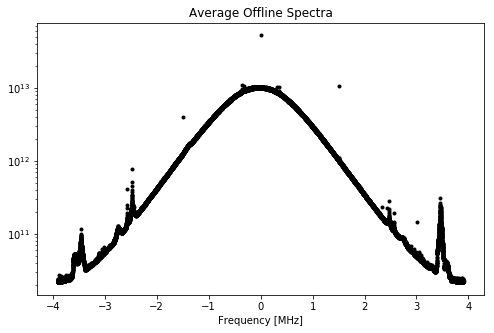

In [53]:
# %matplotlib notebook
import pylab as plt
plt.figure(figsize = (8, 5))
plt.semilogy(offline[1], offline[0], 'k.')
plt.title('Average Offline Spectra')
plt.xlabel('Frequency [MHz]')
plt.show()

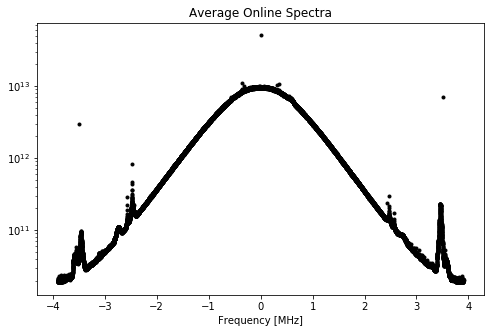

In [52]:
plt.figure(figsize = (8, 5))

plt.semilogy(online[1], (online[0]), 'k.')
plt.title('Average Online Spectra')
plt.xlabel('Frequency [MHz]')
plt.show()

Similarly, for the lower half, use the second as the on-line and the first for the off-line. (The HI line frequency is 1420.4058 MHz).

(10, 16000)


#### 2. Intensity calibration requires a second pair of measurements, which can be short. Easiest is probably to take one with the horn looking at a known blackbody and one looking at the cold sky. Take a short measurement with the horn pointing straight up at the cold sky and the other with as many people as you can find standing in front of it to fill the aperature. Call these spectra sCold and sCal respectivly.

skydata = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('sCold-2-24-19.txt', skydata)

persondata = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('sPerson(1)-2-24-19.txt', persondata)

In [84]:
#Sky data
data = np.loadtxt('sCold-2-24-19.txt')
real = data[:len(data)//2]
imag = data[len(data)//2: len(data)]
complex_data = real + (imag * 1j)

voltage = np.fft.fft(complex_data)
power = np.abs(voltage)**2
        
frequency = np.fft.fftfreq(len(complex_data), 1./(62.5 / 8))
sCold = power, frequency 

In [86]:
#person data
data = np.loadtxt('sPerson-2-24-19.txt')
real = data[:len(data)//2]
imag = data[len(data)//2: len(data)]
complex_data = real + (imag * 1j)

voltage = np.fft.fft(complex_data)
power = np.abs(voltage)**2
        
frequency = np.fft.fftfreq(len(complex_data), 1./(62.5 / 8))
sCal = power, frequency

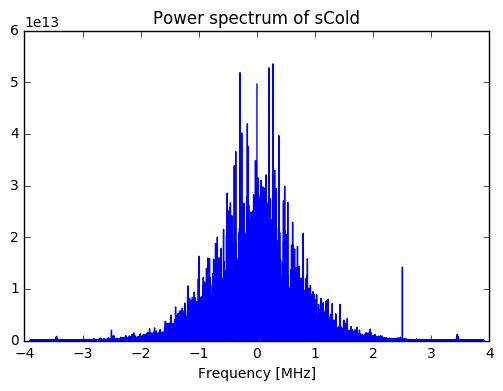

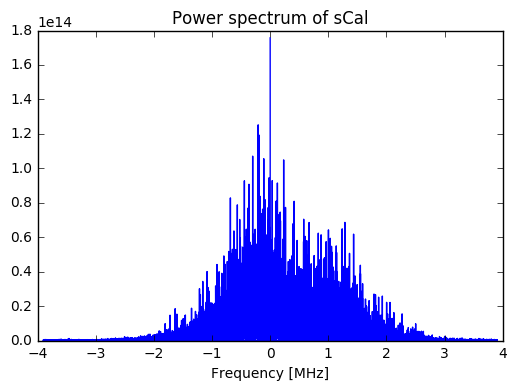

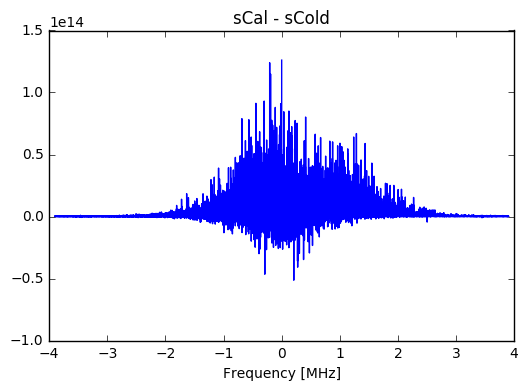

In [77]:
plt.subplot()

plt.plot(sCold[1], sCold[0])
plt.title('Power spectrum of sCold')
plt.xlabel('Frequency [MHz]')
plt.show()

plt.plot(sCal[1], sCal[0])
plt.title('Power spectrum of sCal')
plt.xlabel('Frequency [MHz]')
plt.show()

plt.plot(sCold[1], sCal[0] - sCold[0])
plt.title('sCal - sCold')
plt.xlabel('Frequency [MHz]')
plt.show()

## 7.1. Take a Suitable Average/Median

Consider, first, the s on and s off spectra, from which you can find the line shape. There are many individual spectra, 10000 in our above example. You need to combine these to make a single spectrum for each measurement. You can do this by averaging the power spectra (use numpy’s mean function) or by taking the medians (use numpy’s median function). The former
gives a less noisy result, but the latter handles time-variable interference better; use both and compare the results. 

rough_median_lower_data = np.median(np.array([L[0] for L in lower]), axis=0)

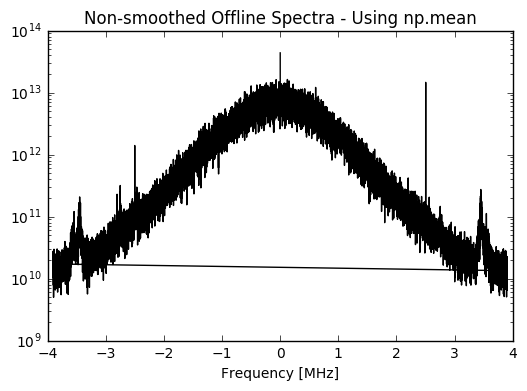

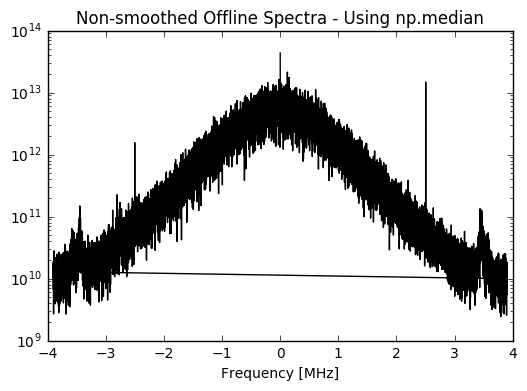

In [23]:
lower_freq = lower[0][1]
#rough_mean_lower_data = np.mean(np.array([L[0] for L in lower]), axis=0)


plt.semilogy(lower_freq, rough_mean_lower_data, 'k-')
plt.title('Non-smoothed Offline Spectra - Using np.mean')
plt.xlabel('Frequency [MHz]')
plt.show()

plt.semilogy(lower_freq, rough_median_lower_data, 'k-')
plt.title('Non-smoothed Offline Spectra - Using np.median')
plt.xlabel('Frequency [MHz]')
plt.show()


Even after combining the 10000 spectra, the resulting spectrum will still look noisy. You can reduce the noise by averaging over channels—by ‘smoothing the spectrum. This reduces the noise, but degrades the spectral resolution, so you have to make a compromise on how many channels to smooth over. To decide, realize that the HI line is never narrower than about 1 km/s, so it’s OK to degrade the frequency resolution to, say, 1 or 2 kHz. Again, you do the smoothing by averaging (by using numpy.mean ) or medianing (by using numpy.median), and again try both to see what happens.

smooth_median_lower_data = np.median(np.array([L[0] for L in lower]), axis=0)

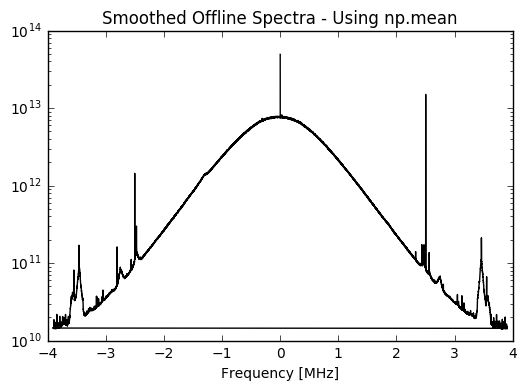

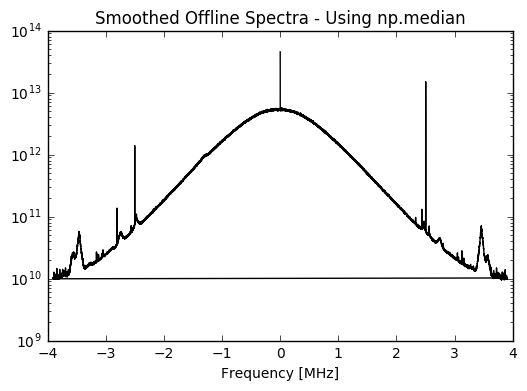

In [48]:
lower_freq = lower[0][1]
#smooth_mean_lower_data = np.mean(np.array([L[0] for L in lower]), axis=0)


plt.semilogy(lower_freq, smooth_mean_lower_data, 'k-')
plt.title('Smoothed Offline Spectra - Using np.mean')
plt.xlabel('Frequency [MHz]')
plt.show()

plt.semilogy(lower_freq, smooth_median_lower_data, 'k-')
plt.title('Smoothed Offline Spectra - Using np.median')
plt.xlabel('Frequency [MHz]')
plt.show()

In the smoothed Sonline spectrum you might not be able to see the HI line, because the instrumental bandpass dominates the spectrum shape. The instrumental bandpass is determined mainly by the low-pass filter, which should fall smoothly to zero as the frequency increases. Does it? If not, should you worry about aliasing?

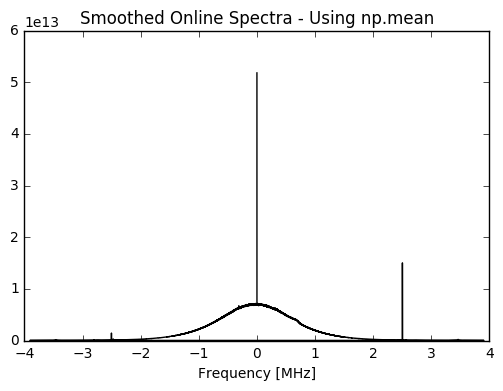

In [184]:
upper_freq = upper[0][1]
smooth_mean_upper_data = np.mean(np.array([L[0] for L in upper]), axis=0)

plt.plot(upper_freq, smooth_mean_upper_data, 'k-')
plt.title('Smoothed Online Spectra - Using np.mean')
plt.xlabel('Frequency [MHz]')
plt.show()


## 7.2. Get the Line Shape
You can remove the instrumental bandpass to get the shape of the line s line (but not
the intensity), by taking the ratio sline = online / offline. This is the first factor (i.e., the shape) in equation (13) in the spectral-line handout.

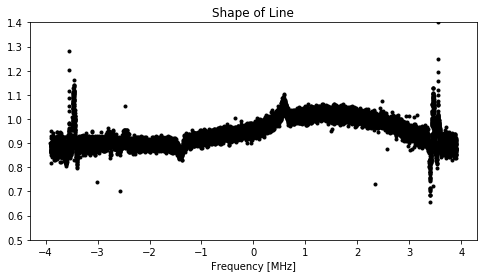

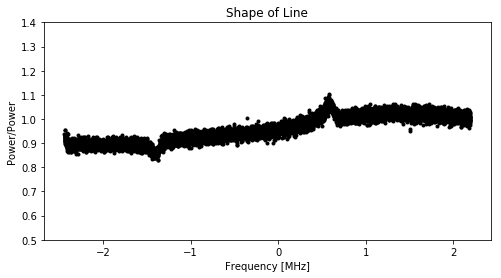

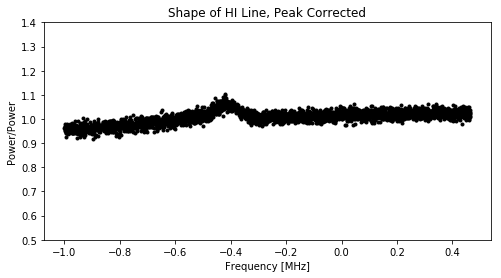

-0.419921875


In [143]:
sLine = (online[0]) / (offline[0])
plt.figure(figsize = (8, 4))
plt.plot(online[1], sLine, 'k.')
plt.title('Shape of Line')
plt.xlabel('Frequency [MHz]')
plt.ylim(0.5, 1.4)
plt.show()

plt.figure(figsize = (8, 4))
plt.plot(online[1][11000:], sLine[11000:], 'k.')
plt.plot(online[1][:4500], sLine[:4500], 'k.')
plt.title('Shape of Line')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power/Power')
plt.ylim(0.5, 1.4)


plt.figure(figsize = (8, 4))
plt.plot(online[1][:3000]-1, sLine[:3000], 'k.')
plt.title('Shape of HI Line, Peak Corrected')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power/Power')
plt.ylim(0.5, 1.4)

plt.show()

print(online[1][np.argmax(sLine[:3000])]-1)


In [175]:
print(LO_1, LO_2)

1230.0 190.0


Shape is determined by the baseband filter, in this case a smooth low pass filter having a gradual falloff at the upper edge.

## 7.3. Get the Line Intensity
To get the line intensity in temperature units, we need to multiply terms of the calibration noise source, multiply the shape spectrum by the gain—the second factor in the handout’s equation (13).

We obtain the gain, G, by using a known difference in system temperature between the the calibration (T sys,cal ) and the cold sky (T sys,cold ) measurements, and seeing how much that known temperature difference changes the measured values in your spectra, as per equation (15) in the handout:

In [87]:
Tcal = 300 #Kelvin
Tcold = 0 #, to a first approximation you can neglect it

Tcmb = 2.7 #K
Tsky_elsewhere = 10 #K
Tsky_galacticplane = 100 #K

In [88]:
G = ((Tcal - Tsky_elsewhere)/ (np.sum((sCal[0] - sCold[0])))) * np.sum(sCold[0])
print('Gain = ', G)

Gain =  123.3671319178697


Here, a sum is over all channels in a spectrum. All this equation does is to convert measured units, which are digital numbers from the system, into physically meaningful units, i.e.
Kelvin.

In [144]:
# Equation 13:
Tline = sLine * G

## 7.4. Plotting Intensity vs. Frequency—and Velocity
First, plot your final calibrated spectrum versus the r.f. frequency. In the absence of Doppler shift, we are left with the line centered at 0.4 MHz. However, the line is shifted and broadened by Galactic rotation and the
Earth's orbital velocity, so it covers a range of frequency of, for example, 1420.2  0:5
MHz.

In [301]:
#np.polyfit??
HI = sLine[:3000]
frequency = online[1][:3000]-1 
increment = frequency[1]+1 - (frequency[0]+1)
length = frequency[len(frequency)-1]+1
np.arange(len(HI), increment)

polyfit = np.polyfit(frequency, HI, 2)

np.arange(frequency[0], frequency[-1], increment)
point1 = frequency[0], polyfit[0] G
point2 = frequency[-1], polyfit[1]+G
print(point1, point2)

(-1.0, -7.983344855833723) (0.46435546875, 0.8878482118591828)


3000


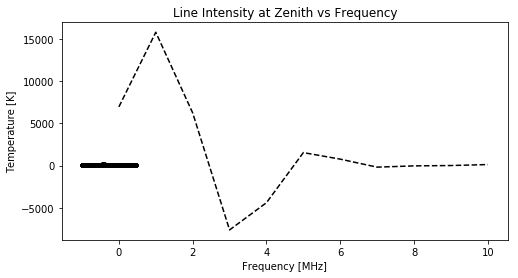

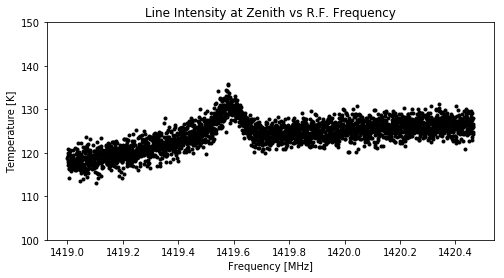

1419.580078125


In [272]:
HI = Tline[:3000]
print(len(HI))

plt.figure(figsize = (8, 4))
frequency = online[1][:3000]-1 
plt.plot(frequency, HI, 'k.')
plt.plot(np.polyfit(frequency, HI, 10), 'k--')
plt.title('Line Intensity at Zenith vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
#plt.ylim(100, 150)

plt.figure(figsize = (8, 4))
frequency = online[1][:3000]-1 + LO_1 + LO_2
plt.plot(frequency, HI, 'k.')
#plt.plot(np.polyfit(HI, frequency, 1), 'k--')
plt.title('Line Intensity at Zenith vs R.F. Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.ylim(100, 150)


plt.show()
print(frequency[np.argmax(Tline[:3000])])

#### Next, plot it versus the Doppler velocity. Remember that, by astronomical convention, positive velocity means motion away (remember the expansion of the Universe!) where c is the speed of light and ∆ν is the frequency offset from the line frequency ν0

v/c = - delta (v) / v0

In [162]:
#take the orginal signal frequency, add back in the LOs, and subtract the HI line frequency
c = scipy.constants.c / 1000 # in km/s
v0 = 1420.4058 #MHz
LO_1 = 1230.0 #MHz
LO_2 = 190.0 #MHz
frequency = online[1][:3000]-1 + LO_1 + LO_2
delta_v = v0 - frequency
doppler_velocity = -(c * delta_v)/v0

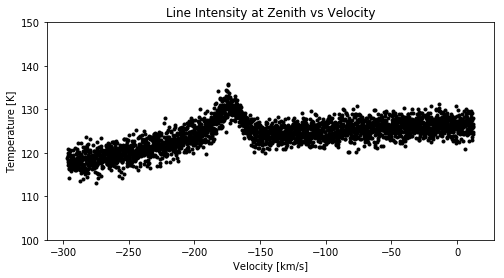

In [168]:
plt.figure(figsize = (8, 4))
plt.plot(doppler_velocity, Tline[:3000], 'k.')
plt.title('Line Intensity at Zenith vs Velocity')
plt.xlabel('Velocity [km/s]')
plt.ylabel('Temperature [K]')
plt.ylim(100, 150)
plt.show()

## 7.5. Finally, Choose a Reference Frame
You may think we’ve done it all by this point, but we haven’t! We need to correct the observed velocity for the orbital velocity of the Earth, and also the Earth’s spin. And when observing the Galaxy, it is customary to express velocities with respect to the Local Standard of Rest (LSR), so that’s yet another correction.

Calculate the Doppler correction using ugradio.doppler.get projected velocity
Correct the velocities and compare the spectrum for the observing frame and the LSR frame,
which is approximately the frame that would rotate around the Galaxy in a circular orbit.
Correcting to the LSR involves many components, including primarily: the rotation of the
observatory around the center of the Earth, the orbit of the Earth around the barycenter
of the solar system, and the peculiar velocity of our Sun with respect to other stars in the
neighborhood. There are higher-order corrections (which are in the barycorrpy package we
are using in ugradio.doppler, see (Wright & Eastman, 2014), including 1) special relativis-
tic treatment of velocity, 2) general relativistic effects from the influence of the gravitational
fields of all bodies in the solar system, and 3) the proper motion of the target source.

1.You need the celestial coordinates of the source, (ra, dec). How to find these for the
horn pointing straight up? You could use rotation matrices. However, when looking
straight up you don’t need this powerful technique because, quite simply, the Dec is equal to the Latitude and RA=LST.

2.You need the Julian day of the observation; see §4.

3.You need the observatory coordinates (north latitude and west longitude) in degrees;
you could enter them with the pair of optional input parameters (obs lat, obs lon),
but you don’t have to because the default values are Campbell Hall’s values (which are
lat= 37.873199 lon= −122.2573 degrees).

## 8. IN THE LAB: YOUR SECOND 21-cm LINE MEASUREMENT (Second Week; by GROUPS)

Obtain a fully-calibrated spectrum for the horn pointing at Galactic coordinates (l, b) = (120 , 0). How do you know where to point the horn? You definitely do need to use rotation matrices! See the handout “Spherical Coordinate Transformation” (§5). Plot your spectrum
versus both the observed and the LSR velocity.

In [242]:
julian_now = ugradio.timing.julian_date()
altitude, azimuth = coord.get_altaz(120,0, julian_now)
print('altitude = ', altitude)
print('azimuth = ', azimuth)

('altitude = ', 23.877576658645495)
('azimuth = ', 110.22002320498363)


In [268]:
cassA = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000, nblocks = 1000)
np.save('cassA_upper_5', cassA)

In [269]:
cass_upper = [average_powerspectrum(np.load(f)) for f in glob.glob('cassA_upper*.npy')]

In [271]:
cass_lower = [average_powerspectrum(np.load(f)) for f in glob.glob('cassA_lower*.npy')]

In [273]:
cass_upper_data = np.mean(np.array([L[0] for L in cass_upper]), axis=0)
cass_lower_data = np.mean(np.array([L[0] for L in cass_lower]), axis=0)

cass_freq = cass_upper[0][1]

cass_sline = cass_upper_data / cass_lower_data
Tline = cass_sline * G

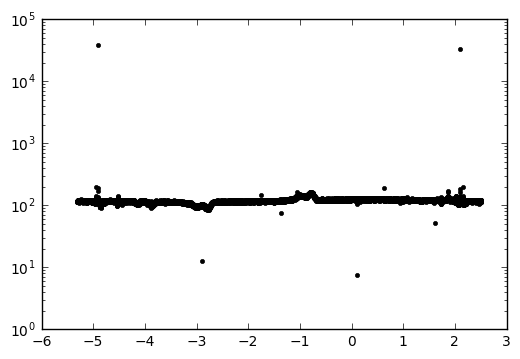

In [280]:
plt.semilogy(cass_freq-1.4, Tline, 'k.')
plt.show()